In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.perf_counter()

# Parametry fizyczne
hbar = 1.0
m = 1.0

# Siatka przestrzenna
N = 2**13
x_max = 2.0
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Operator Laplace’a (druga pochodna)
diag = -2.0 * np.ones(N)
off_diag = 1.0 * np.ones(N - 1)
T = (np.diag(diag) + np.diag(off_diag, +1) + np.diag(off_diag, -1)) / dx**2

# Potencjał studni kwadratowej
V = np.full(N, 10**10)  # bardzo duża wartość domyślnie
mask = (x > -1) & (x < 1)
V[mask] = 0       # studnia potencjału
V_matrix = np.diag(V)

# Hamiltonian
H = -(hbar**2 / (2 * m)) * T + V_matrix

# Rozwiązanie zagadnienia własnego
energies, wavefuncs = np.linalg.eigh(H)

end = time.perf_counter()
print(f"Czas działania: {end - start:.6f} sekundy")

Czas działania: 63.287290 sekundy


Najniższe energie własne:
E_0 = 1.232797
E_1 = 4.931187
E_2 = 11.095169
E_3 = 19.724738
E_4 = 30.819890
E_5 = 44.380617
E_6 = 60.406913
E_7 = 78.898767
E_8 = 99.856168
E_9 = 123.279105


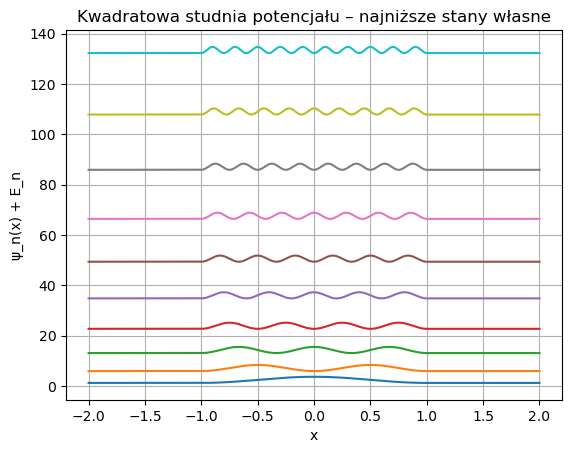

In [3]:
# Najniższe energie
print("Najniższe energie własne:")
for i in range(10):
    print(f"E_{i} = {energies[i]:.6f}")

# Normalizuję i rysuję funkcje falowe
for i in range(10):
    plt.plot(x, 5000*np.abs(wavefuncs[:, i])**2 + energies[i] + i)       # ψ_n przesunięta w pionie
plt.title("Kwadratowa studnia potencjału – najniższe stany własne")
plt.xlabel("x")
plt.ylabel("ψ_n(x) + E_n")
plt.grid()
plt.show()


In [24]:
len(wavefuncs[:, 0:2])

8192

In [33]:
wavefuncs[:, 0:2][:,0]

array([1.77506473e-25, 3.97677180e-25, 1.90389708e-25, ...,
       3.83310395e-25, 4.41214934e-25, 2.71783598e-25], shape=(8192,))

In [16]:
np.save("funkcje psi(E) dla studni kwadratowej nieskończonej 1D FD.npy", wavefuncs[:, 0:10])

In [4]:
len(energies)

8192

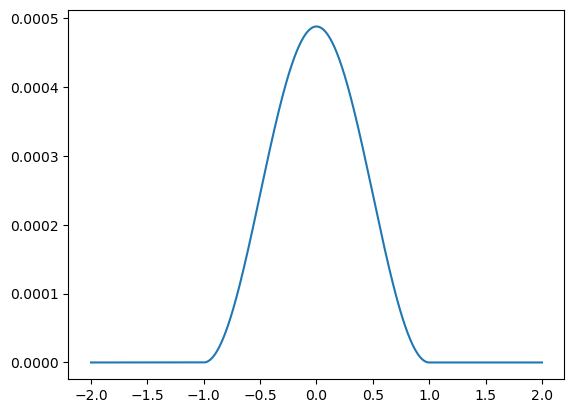

In [19]:
plt.plot(x, np.abs(wavefuncs[:, 0])**2)